# R Exercises - part 4
- Name: Alberto Coppi
- Student ID: 2053063
- E-mail: <alberto.coppi@studenti.unipd.it>

## Import useful libraries

In [5]:
library(ggplot2)
library(gridExtra)
library(dplyr)
library(readr)
library(lubridate)
library(tidyr)
library(evaluate)


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Ex1 - Community Mobility Open Data

In order to run the code as is, we need to unzip regional data into a subfolder in the present working directory

In [2]:
regions <- c('ES', 'FR', 'IT', 'FI', 'RU')

filename <- "Region_Mobility_Report_CSVs/%i_%s_Region_Mobility_Report.csv"
filenames <- list()
for (country in regions) {
    for (year in 2020:2022) {
        filenames <- c(filenames, sprintf(filename, year, country))
    }  
}

data <- lapply(filenames, read_csv, show_col_types=F) %>% bind_rows

In [48]:
# average data by week
data_byweek <- data %>% group_by(country_region_code, year=year(date), week=week(date)) %>% 
               summarise(date =                  min(date),
                         retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline, na.rm=T),
                         grocery_and_pharmacy =  mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm=T), 
                         parks =                 mean(parks_percent_change_from_baseline, na.rm=T), 
                         transit_stations =      mean(transit_stations_percent_change_from_baseline, na.rm=T), 
                         workplaces =            mean(workplaces_percent_change_from_baseline, na.rm=T), 
                         residential =           mean(residential_percent_change_from_baseline, na.rm=T)) %>%
               ungroup(year, country_region_code) %>% 
               select(date, country_region_code, retail_and_recreation,
                      grocery_and_pharmacy, 
                      parks, 
                      transit_stations, 
                      workplaces, 
                      residential) %>%
               pivot_longer(., cols = c(retail_and_recreation,
                                        grocery_and_pharmacy, 
                                        parks, 
                                        transit_stations, 
                                        workplaces, 
                                        residential), 
                            names_to = "Var", values_to = "Val")

# average data by month
data_bymonth <- data %>% group_by(country_region_code, year=year(date), month=month(date)) %>% 
                summarise(date =                  min(date),
                          retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline, na.rm=T),
                          grocery_and_pharmacy =  mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm=T), 
                          parks =                 mean(parks_percent_change_from_baseline, na.rm=T), 
                          transit_stations =      mean(transit_stations_percent_change_from_baseline, na.rm=T), 
                          workplaces =            mean(workplaces_percent_change_from_baseline, na.rm=T), 
                          residential =           mean(residential_percent_change_from_baseline, na.rm=T)) %>%
                ungroup(year, country_region_code) %>% 
                select(date, country_region_code, retail_and_recreation,
                       grocery_and_pharmacy, 
                       parks, 
                       transit_stations, 
                       workplaces, 
                       residential) %>%
                pivot_longer(., cols = c(retail_and_recreation,
                                         grocery_and_pharmacy, 
                                         parks, 
                                         transit_stations, 
                                         workplaces, 
                                         residential), 
                             names_to = "Var", values_to = "Val")



`summarise()` has grouped output by 'country_region_code', 'year'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'country_region_code', 'year'. You can
override using the `.groups` argument.


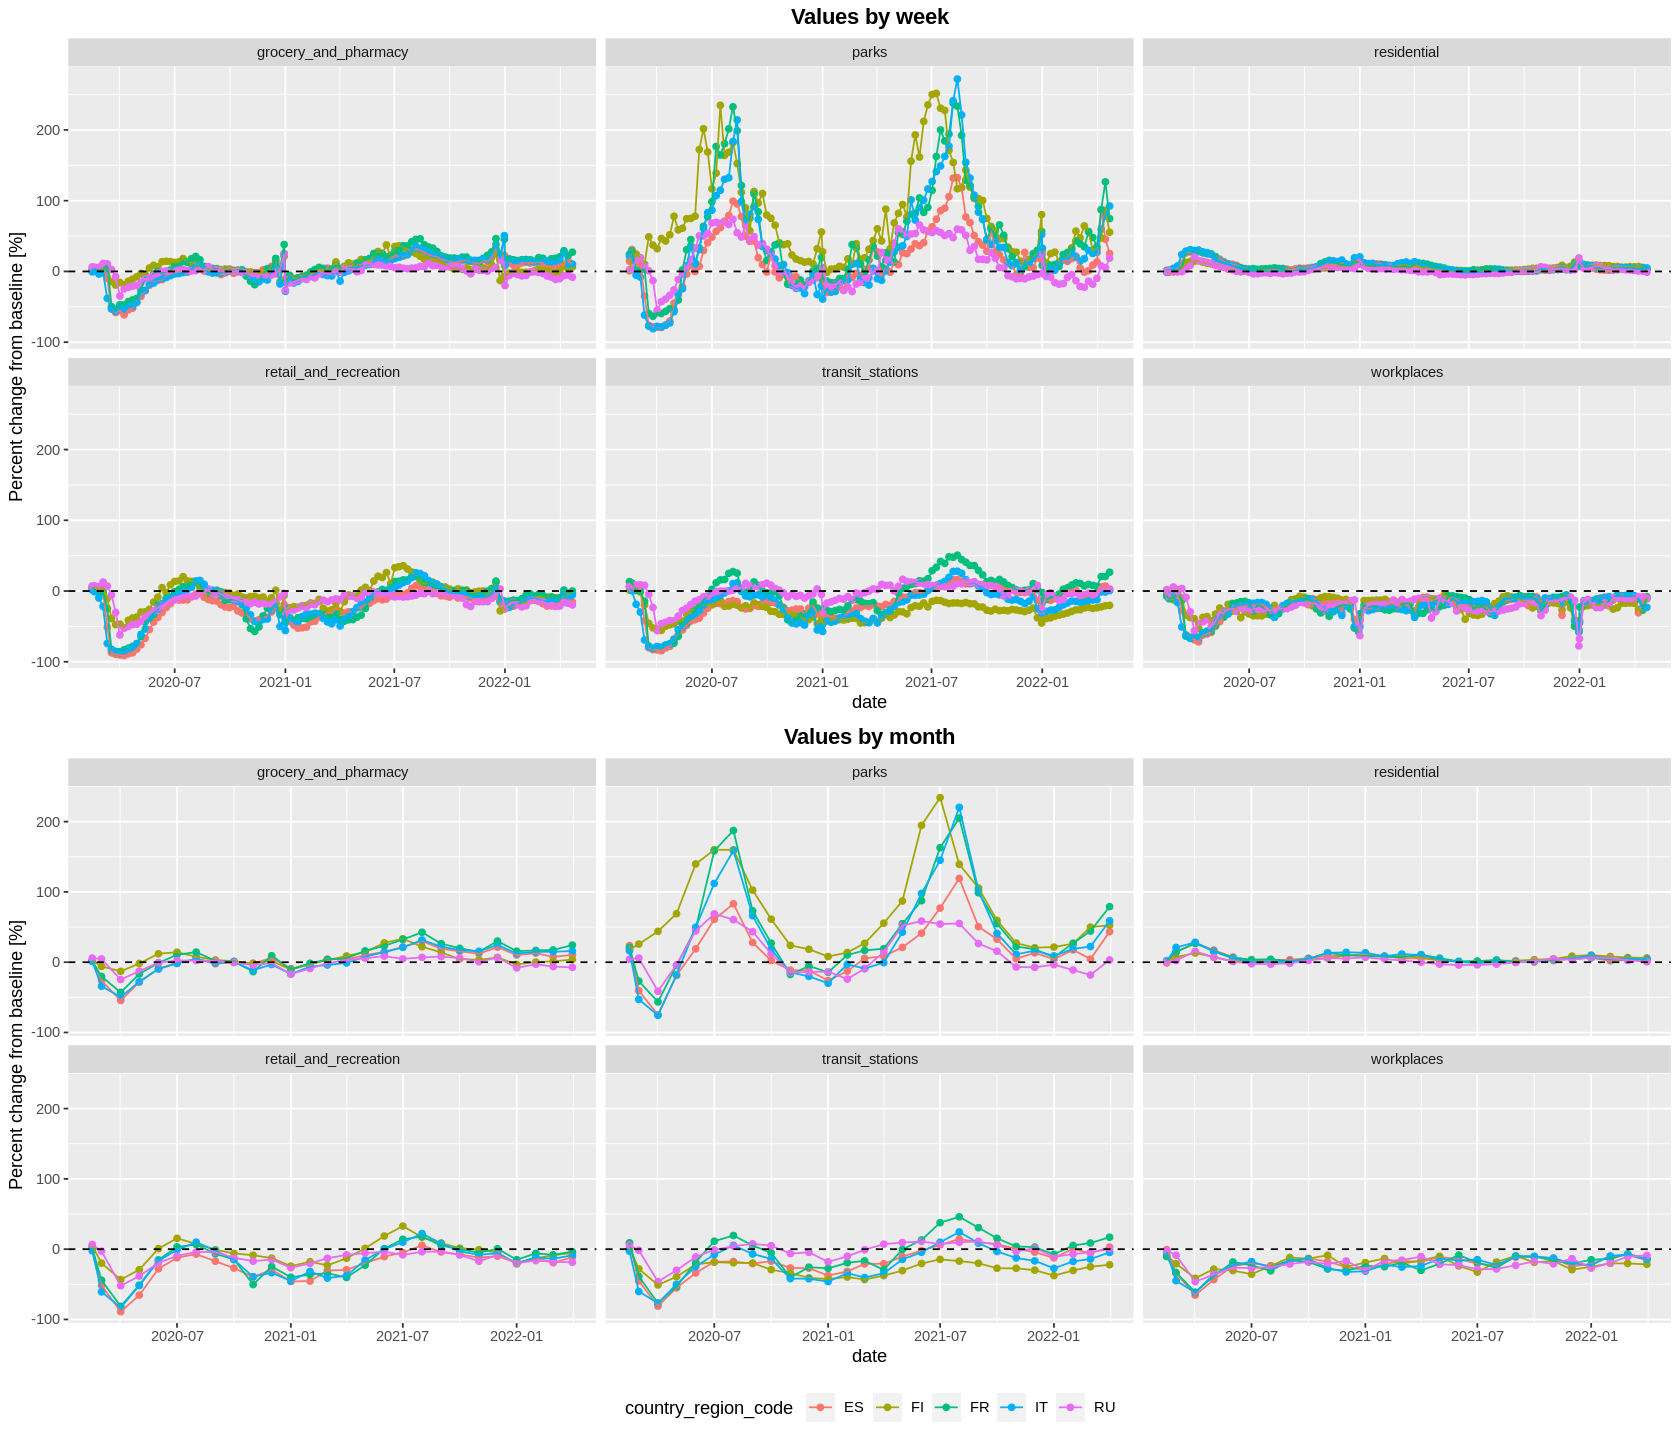

In [64]:
options(repr.plot.width=14, repr.plot.height=12)

p_byweek  <- ggplot(data_byweek, aes(x = date, y = Val, color = country_region_code)) +
             geom_point() +
             geom_line() +
             geom_hline(yintercept=0, linetype='dashed', color='black') +
             labs(title="Values by week", y="Percent change from baseline [%]") +
             theme(plot.title = element_text(hjust=0.5, face='bold'), legend.position='none')+
             facet_wrap(.~Var)

p_bymonth <- ggplot(data_bymonth, aes(x = date, y = Val, color = country_region_code)) +
             geom_point() +
             geom_line() +
             geom_hline(yintercept=0, linetype='dashed', color='black') +
             labs(title="Values by month", y="Percent change from baseline [%]") +
             theme(plot.title = element_text(hjust=0.5, face='bold'), legend.position='bottom')+
             facet_wrap(.~Var)

grid <- arrangeGrob(p_byweek, p_bymonth, nrow=2)
grid::grid.draw(grid)

From the graphs above we see that all mobilities, except residential related, had a sudden decrease for the first lockdown in all countries taken into account.  
This does not apply to parks mobility in Finland, which had an increase and then followed the same trend of other countrues.  
Residential mobility had an increase as lots of people moved to second houses or back home with family during the first lockdown and then it remains stable.  
We can also see a second decrease concurrently with the second lockdown, except for workplaces.  
Parks, grocery and pharmacy, retail and recreation and transit station mobility had an increase during summer (greater in summer 2021 than 2020).  
It's intersting to see that workplaces mobility never got over baseline.


In [65]:
# if you want to save the plot
ggsave('regional_mobility.pdf', plot = grid, dpi=600, width=28, height=24, units='cm')

## Ex2 - Random number generators
### The middle square algorithm

In [2]:
# print output while running cell
evaluate::inject_funs(
  flush.console = function() { base::flush.console(); evaluate::flush_console() },
  flush = function(con) { base::flush(con); evaluate::flush_console() }
)

midsquare <- function(n, x=12345) {
    
    if(x%%1!=0 || x==1) cat("Please insert an integer number different from 1 as seed!")
    else {
        options(scipen=999)                    # avoid scientific representation
        len    <- nchar(x)
        result <- c()
        for( i in 1:n ) {
            x2.chr <- unlist(strsplit(as.character(x^2), ""))
            len2   <- length(x2.chr)

            start.index <- floor((len2 - len) / 2) + 1
            if(start.index < 0) start.index <- 1

            y <- as.numeric(paste(x2.chr[start.index : ifelse((start.index + len-1) <= len2, start.index + len-1, len2)], collapse=""))
            result <- c(result, y)
            x.pre <- x
            x <- y
            
            while(y==1 || y==0) {
                cat("encountered 1 or 0 , resqauring...: ", x,"\n")
                x <- x.pre^2
                x2.chr <- unlist(strsplit(as.character(x^2), ""))
                len2   <- length(x2.chr)
                start.index <- floor((len2 - len) / 2)
                if(start.index < 0) start.index <- 1
                y <- as.numeric(paste(x2.chr[start.index : ifelse((start.index + len) <= len2, start.index + len, len2)], collapse=""))
                x.pre <- x.pre^2
                flush_console()
            }                
        }
        options(scipen=0)                    # restore scientific representation
        return(result)
    } 
}

In [3]:
seed <- 56894712
n    <- 1000
r <- midsquare(n, seed)
cat("Seed:", seed, sprintf("\nPercentage of repetitions: %.2f %%", (n-length(unique(r)))*100/n), "\n")
r

Seed: 56894712 
Percentage of repetitions: 0.00 % 


[1]   825356 12125267  2209982 84020440 43433779 49315822  5029953   427182
   [9] 24844611 25469574 69919974 80276416 30296580 88275969 64670288 24615000
  [17] 89822500  8150625 32687890 49815265 56062702  2655554 51967046 57386996
  [25] 26730990 54582638 26437103 92041503 63827449 94324584 12714677 66301121
  [33] 83864585 26861722 55210880 24127037 11391439 76488249 45223508 16567582
  [41] 48477332  5171783 47339399  1869768 96032373 21666401 43293229 30367724
  [49] 19866094 66169081 34728038  3662332 12675678 67281275 76996562 47055981
  [57] 26534787  9492113   209204 37663136 51181335 52905238 96420783 96739433
  [65] 51789716 17468336 14276260 81159958 93878256 12694960 16200940 47045688
  [73] 29675939 66135553 91137061 96388771 79517489  3105686 45285530 77922738
  [81] 95309741 94672948 96708301 49548230  2709613 42002609 21916280 32332903
  [89] 41661640 69224748  6573566 11769956 53186424 79569790 35148064 38640294
  [97]  7232040  2402561 72299358 19716721 74908699 31318587 85389167 30984095
 [105]  1414296   233175 43705806 19747810 97599979 75590080 86019440 34405791
 [113] 75845433 52970695 89452878 81738248 14118610 33514833 24403101 51133841
 [121] 66969541 91942175 36354373 64043622 58551887 32347126 33656045 72936504
 [129] 73361574 92053975 93431330 41342556 20693661 22760558  4300047 90404202
 [137] 91973925 20287990 60253824 52330662 49818535 88642954 57329384 65826981
 [145] 19142757 44514556 54569587 83982535  6618502  4568724 73238988 94936326
 [153] 90599437 25798471 56110593 39864681 19279123 68458364 54760155 67457562
 [161] 52267098 84953334  6895771 51657684 51631624 82459687 59998013 76156394
 [169] 79634708 68671824 81941148 35173555 17897133 30736961 76077151 73290427
 [177] 48668984 67000359  4810612 41987814 97652449    79569 33122576 10504087
 [185] 33584370 90990829 33096210 35911636 64560019 99605328 22136598  2897101
 [193] 93194204 15965919 91056951 36832541 63607651 93326573 84922792 88060107
 [201] 58244485 42003291 27645483 27273030 81816538 94589030  8459634 65407413
 [209] 12967535 15696397 37687878 37614814 87423225 82026940 41888576 65279930
 [217] 46926080  5698416 71944909  6993101  3461596 82646867 50462491 46299792
 [225] 67073924 91128075 32605320 10689230 25963799 11885851 27345399 77084646
 [233]  4264894 89320831 21085053 57946001 73903189 68134436 30136903 23292243
 [241] 52858397  1013340 26857955 34974678 22810120 30157441 47124766 74357055
 [249] 97162827 61495063 64277337 57605181 35687804 61935434 99798476 73581192
 [257] 19181614 93431564 45715148 87475666 99214214 46025963 38927007 31187397
 [265] 65373163 65044062 73000145  2117002 81697468 47627761 40361787  7384983
 [273] 37973910  1784068 82898628 18252428 15112789 39639135 26102354 33288434
 [281] 11983817 61186988 84750051 57114450  6039880 80150414  8886437 68762554
 [289] 28883260 24270822  7280055 99200803 79931584  5812074 80204181 71064988
 [297] 23251944 65289977 78109666 11992263 81437186  1526359 29771796 35983706
 [305] 82709749 90257964 50006542 65424279 33628266 86027416 71630363 90890351
 [313]  5590490 53578440 64923283  3267549 76876467 99117840 34620626 58774463
 [321] 43750093  7063750 96564062 61806993 10438370 95956825 71226408 20119658
 [329] 80063803 21255082 77851082 79096857 31278727 35876274 10703612 56730984
 [337] 40454560 57142479 26290626 19701547 15095419 87167478 16922088 35706227
 [345] 93464657 64210812  2837769 52932897 89158481 23473422   154039 37280135
 [353] 80846561 16642552 97453707 22500804 28618064 99358710 15325286 86439098
 [361] 71766305 40253335 33097862 46846897 63175852 18827592 47822051 94856184
 [369] 69564304 19239100 14296881 40080632 45706151  5223923 89371509 26662093
 [377] 86720314 41286025 53586030 46261116  9085356 43693646 13470077 44297438
 [385] 26301336 76027538 18653434 95059999 40340988 39531281 72217750 40341506
 [393] 43710634 61952468 10829129 27003489 18841817  1406786 79046849 40433682
 [401] 88264007 53493169 51912966 95603891 10397433 1

## Ex3 - Bayesian Inference
### a)
Given that each person can either read the last issue of the journal or not, I would assume a binomial distribution with $p=\frac{29}{150}$

### b)
Given a binomial likelihood $Binom(n=150, p=\frac{29}{150})$ and a uniform prior $\mathcal{U}(0,1)$, the posterior is a binomial distribution in data, but not in the parameter. We have to normilize it by the evidence. Below we do normalization by numerical integration

In [2]:
# try to let R do all the calculations
l.p <- 29/150
l.n <- 150
data <- 29

likelihood <- function(p, n, x) {dbinom(x, size=n, prob=p)}
prior      <- dunif

evidence <- function(x) {
    z <- integrate(function(p) {dbinom(x, size=l.n, prob=p)}, lower=0, upper=1)[[1]]
    return(z)
}

posterior <- function(p, x) {
    return(sapply(p, likelihood, l.n, x, simplify=T)*prior(p, 0, 1)/evidence(x))
}


### c)

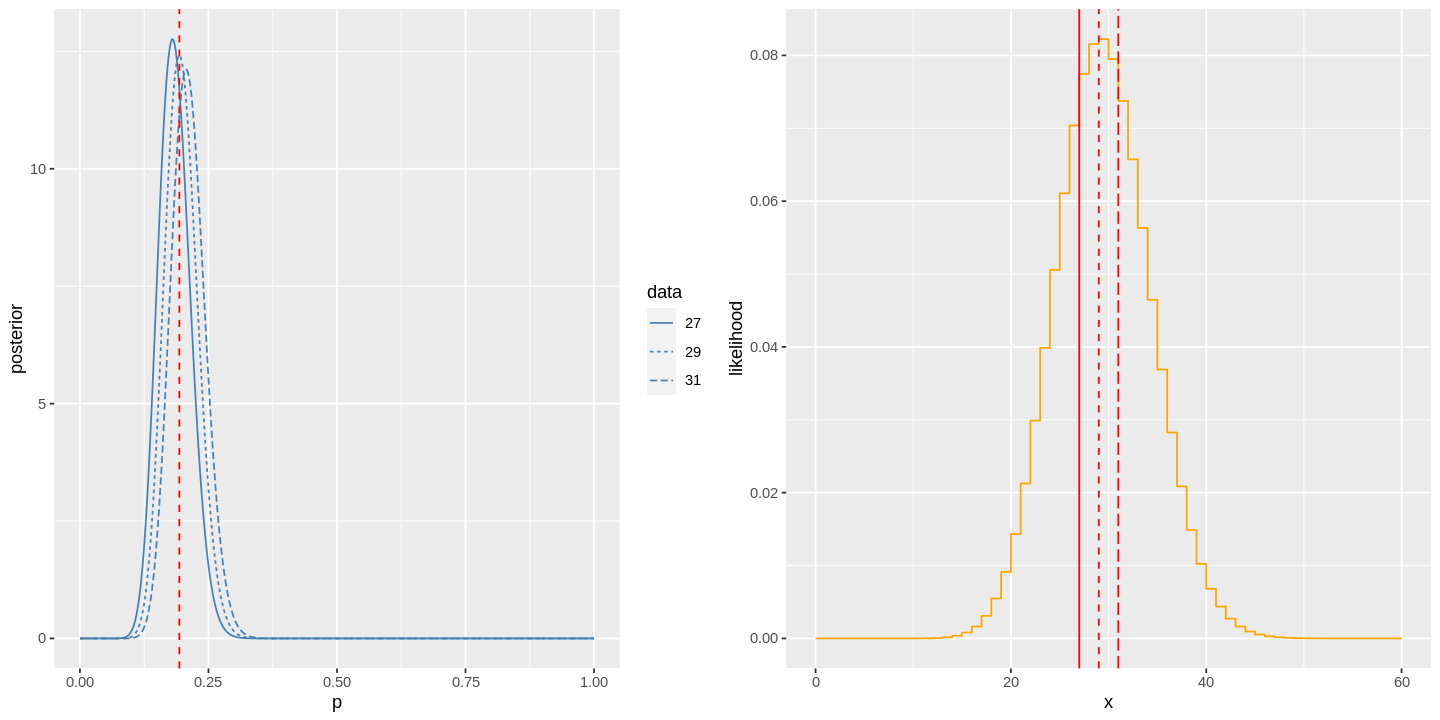

In [5]:
options(repr.plot.width=12, repr.plot.height=6)

p <- seq(0, 1, length.out=500)
x <- seq(0, 60, 1) 
post.data <- data.frame(p=p, posterior=c(posterior(p, data), posterior(p, 27), posterior(p, 31)), 
                             data=c(rep('29', length(p)), rep('27', length(p)), rep('31', length(p))))

plt.post <- ggplot(post.data, aes(x=p, y=posterior, linetype=data)) +
            geom_path(color='steelblue') +
            geom_vline(xintercept=l.p, color='red', linetype='dashed')
plt.like <- ggplot(data.frame(x=x, likelihood=likelihood(l.p, l.n, x)), aes(x=x, y=likelihood)) +
            geom_step(color='orange') +
            geom_vline(xintercept=data, color='red', linetype='dashed') +
            geom_vline(xintercept=27, color='red') +
            geom_vline(xintercept=31, color='red', linetype='longdash')

grid.arrange(plt.post, plt.like, ncol=2)

## Ex4 - Bayesian Inference pt.2

In [189]:
# true is tail, false is head
outcomes <- c(T, T, T, T, T, F, T, T, F, F, T, T, F, F, F, T, F, T, F, T, F, F, T, F, T, F, T, F, F, F)

# try to let R do all the calculations
l.p <- 1/2
l.n <- length(outcomes)

likelihood <- function(p, n, x) {dbinom(x, size=n, prob=p)}

evidence <- function(x, n, prior, ...) {
    z <- integrate(function(p) {dbinom(x, size=n, prob=p)*prior(p, ...)}, lower=0, upper=1)[[1]]
    return(z)
}

posterior <- function(p, n, x, prior, ...) {
    return(sapply(p, likelihood, n, x, simplify=T)*prior(p, ...)/evidence(x, n, prior, ...))
}


### a)

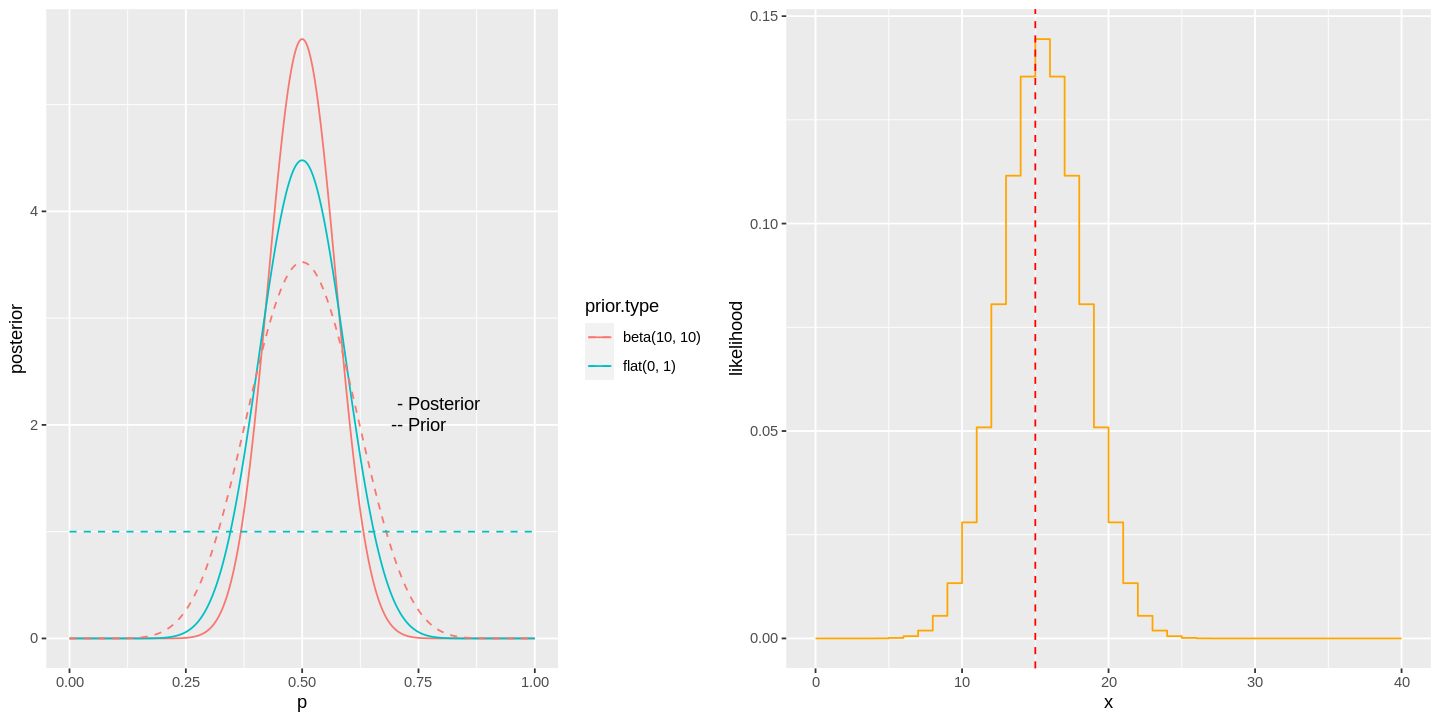

In [190]:
alpha <- 10
beta  <- 10
a     <- 0
b     <- 1
p     <- seq(0, 1, length.out=500)
x     <- seq(0, 40, 1)
n.success <- table(outcomes)[['TRUE']]

postpri.data <- data.frame(p=c(p, p), 
                           posterior=c(posterior(p, l.n, n.success, dunif, a, b), 
                                       posterior(p, l.n, n.success, dbeta, alpha, beta)), 
                           prior.type=c(rep(sprintf('flat(%i, %i)', a, b), length(p)), 
                                        rep(sprintf('beta(%i, %i)', alpha, beta), length(p))),
                           prior=c(dunif(p, a, b), dbeta(p, alpha, beta)))

options(repr.plot.width=12, repr.plot.height=6)

# plot posterior and prior together for both flat and beta priors
plt.postpri <- ggplot(postpri.data, aes(x=p, color=prior.type)) +
               geom_path(aes(y=posterior)) +
               geom_path(aes(y=prior), linetype='dashed') +
               annotate(geom="text", x=0.794, y=2.2, label="- Posterior") +
               annotate(geom="text", x=0.75, y=2, label="-- Prior")
# plot likelihood
plt.like    <- ggplot(data.frame(x=x, likelihood=likelihood(l.p, l.n, x)), aes(x=x, y=likelihood)) +
               geom_step(color='orange') +
               geom_vline(xintercept=n.success, color='red', linetype='dashed')

grid.arrange(plt.postpri, plt.like, ncol=2)

### b)

In [165]:
# assuming a symmetric distribution centered in mean value
confidence_interval <- function(mean, dist, ..., cl=0.95, precision=10^-4) {
    a <- mean
    b <- mean
    while (TRUE) {
        z <- integrate(dist, lower=a, upper=mean, ...)[[1]] +
             integrate(dist, lower=mean, upper=b, ...)[[1]]
        if(z > cl) break
        else if((a-precision >= 0) || (b+precision <= 1)) {
            if(a-precision >= 0) a <- a-precision
            if(b+precision <= 1) b <- b+precision  
        }
        else break
    }
    return(c(a, b))
}

In [166]:
cl <- 0.95
mode.flat <- optimize(posterior, interval=c(0, 1), l.n, n.success, dunif, a, b, maximum=TRUE)$maximum
mode.beta <- optimize(posterior, interval=c(0, 1), l.n, n.success, dbeta, alpha, beta, maximum=TRUE)$maximum

conf.interval.flat <- confidence_interval(mean=mode.flat, dist=posterior, l.n, n.success, dunif, a, b, cl=cl)
conf.interval.beta <- confidence_interval(mean=mode.beta, dist=posterior, l.n, n.success, dbeta, alpha, beta, cl=cl)

cat("Considering the whole dataset\n")
cat(sprintf("Flat prior:\n\tMode: %.2f\n\t%i%% C.I.: %.4f - %.4f", mode.flat, cl*100, conf.interval.flat[[1]], conf.interval.flat[[2]]), '\n')
cat(sprintf("Beta prior:\n\tMode: %.2f\n\t%i%% C.I.: %.4f - %.4f", mode.beta, cl*100, conf.interval.beta[[1]], conf.interval.beta[[2]]), '\n')

Considering the whole dataset
Flat prior:
	Mode: 0.50
	95% C.I.: 0.3306 - 0.6694 
Beta prior:
	Mode: 0.50
	95% C.I.: 0.3633 - 0.6367 


### c)

In [254]:
# due to R lazy evaluation let's fall back to a more theoretical approach for this assignment

cl <- 0.95

prior.type.flat <- sprintf('flat(%i, %i)', a, b)
prior.type.beta <- sprintf('beta(%i, %i)', alpha, beta)

df.flat <- data.frame(mode=NA, mode.opt=NA, ci.low=0, ci.up=1, prior.type=prior.type.flat) 
df.beta <- data.frame(mode=NA, mode.opt=NA, ci.low=0, ci.up=1, prior.type=prior.type.beta)

# flat prior
a.pre     <- 1
b.pre     <- 1
# beta prior
alpha.pre <- alpha
beta.pre  <- beta

# next iterations using previous posterior as prior
for (n in seq_along(outcomes)) {

    # update parameter for beta function for both flat and beta prior cases
    r <- outcomes[[n]]
    a.pre <- a.pre + r
    b.pre <- b.pre + 1 - r
    alpha.pre <- alpha.pre + r
    beta.pre  <- beta.pre + 1 - r

    mode.flat <- optimize(dbeta, interval=c(0, 1), a.pre, b.pre, maximum=TRUE)$maximum
    mode.beta <- optimize(dbeta, interval=c(0, 1), alpha.pre, beta.pre, maximum=TRUE)$maximum

    ci.flat <- confidence_interval(mean=mode.flat, dist=dbeta, a.pre, b.pre, cl=cl)                 # use my function instead of qbeta due to mistakes in the first steps
    ci.beta <- confidence_interval(mean=mode.beta, dist=dbeta, alpha.pre, beta.pre, cl=cl)

    df.flat[n, 1:4] <- c((a.pre-1)/(a.pre + b.pre-2), mode.flat, ci.flat[[1]], ci.flat[[2]])
    df.flat[n, 5]   <- prior.type.flat
    df.beta[n, 1:4] <- c((alpha.pre-1)/(alpha.pre+beta.pre-2), mode.beta, ci.beta[[1]], ci.beta[[2]])
    df.beta[n, 5]   <- prior.type.beta

}

df <- rbind(df.flat, df.beta)
cat("Final step of sequential analysis\n")
cat(sprintf("Flat prior:\n\tMode: %.2f\n\t%i%% C.I.: %.4f - %.4f", mode.flat, cl*100, conf.interval.flat[[1]], conf.interval.flat[[2]]), '\n')
cat(sprintf("Beta prior:\n\tMode: %.2f\n\t%i%% C.I.: %.4f - %.4f", mode.beta, cl*100, conf.interval.beta[[1]], conf.interval.beta[[2]]), '\n')


Final step of sequential analysis
Flat prior:
	Mode: 0.50
	95% C.I.: 0.3306 - 0.6694 
Beta prior:
	Mode: 0.50
	95% C.I.: 0.3633 - 0.6367 


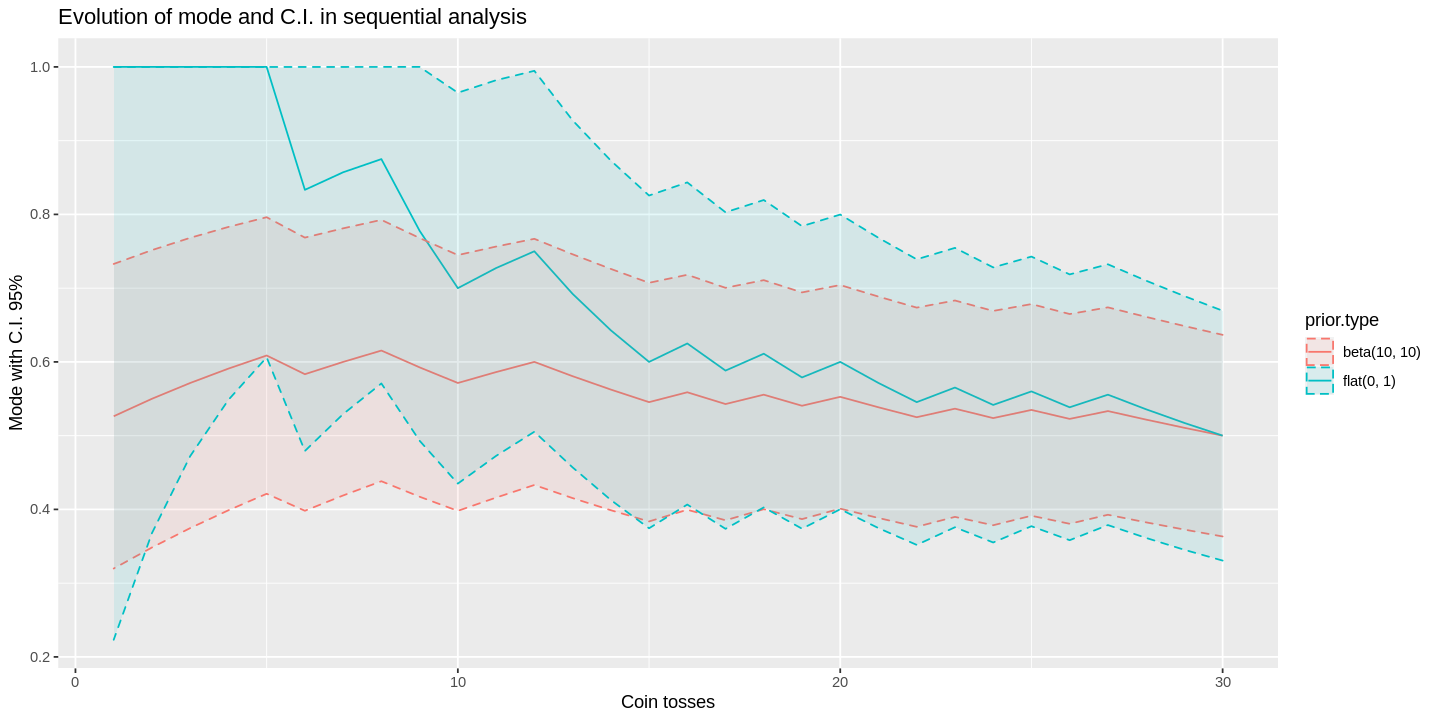

In [257]:
steps <- as.numeric(rownames(df))
steps <- steps[1:(length(steps)/2)]

# plot data
ggplot(df, aes(x=c(steps, steps), color=prior.type, fill=prior.type)) +
geom_path(aes(y=mode)) +
geom_ribbon(aes(ymin = ci.low, ymax = ci.up), alpha=0.1, linetype="dashed") +
labs(title='Evolution of mode and C.I. in sequential analysis', y=sprintf('Mode with C.I. %.i%%', cl*100), x='Coin tosses')

### d)
I get the exact same result for the last step of sequential and the one-step analysis. Let's see the distributions:

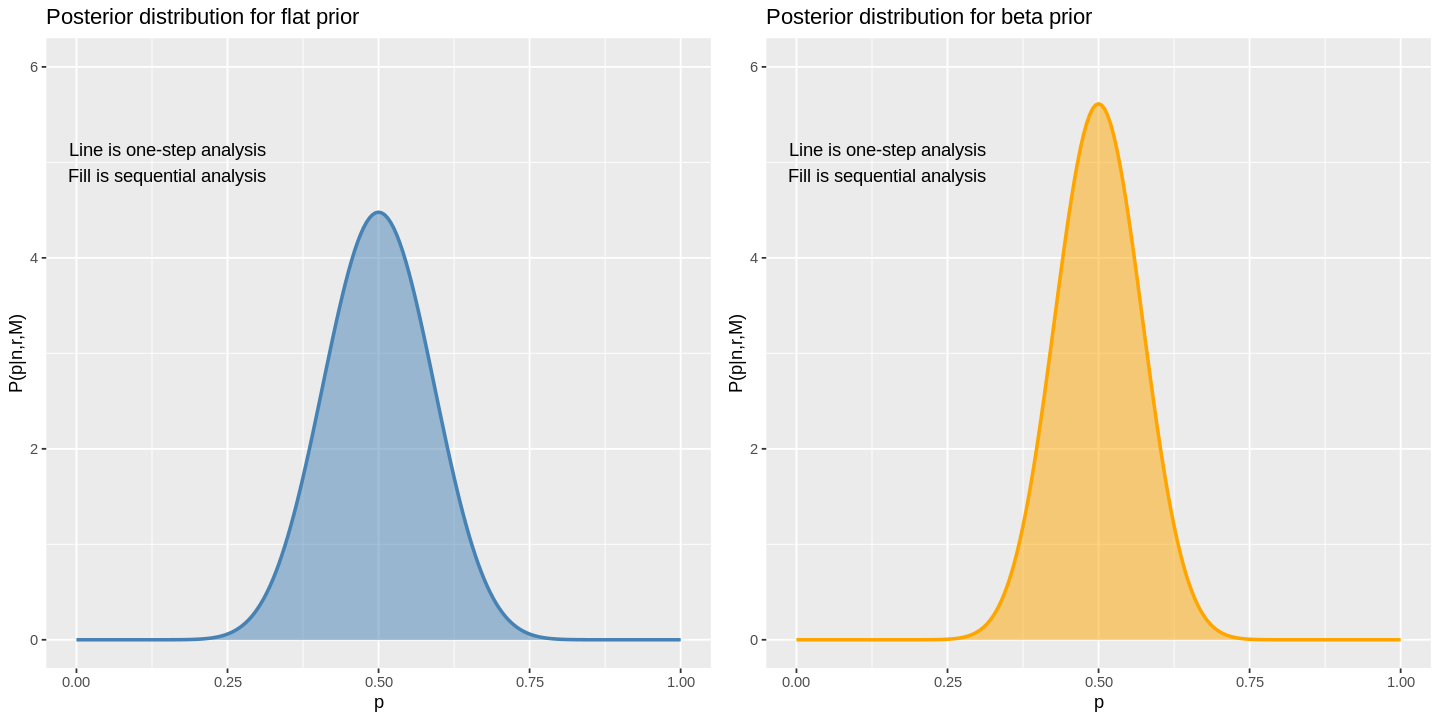

In [274]:
p <- seq(0, 1, length.out=201)

plt.flat <- ggplot(data.frame(p=p, whole=posterior(p, l.n, n.success, dunif, a, b), sequential=dbeta(p, a.pre, b.pre)), aes(x=p)) +
            geom_path(aes(y=whole), color='steelblue', size=1) +
            geom_ribbon(aes(ymax=sequential, ymin=0), color=NA, fill='steelblue', alpha=0.5) +
            labs(title='Posterior distribution for flat prior', y='P(p|n,r,M)') +
            annotate(geom='text', x=0.15, y=5, label='Line is one-step analysis\nFill is sequential analysis') +
            ylim(0, 6)
plt.beta <- ggplot(data.frame(p=p, whole=posterior(p, l.n, n.success, dbeta, alpha, beta), sequential=dbeta(p, alpha.pre, beta.pre)), aes(x=p)) +
            geom_path(aes(y=whole), color='orange', size=1) +
            geom_ribbon(aes(ymax=sequential, ymin=0), color=NA, fill='orange', alpha=0.5) +
            labs(title='Posterior distribution for beta prior', y='P(p|n,r,M)') +
            annotate(geom='text', x=0.15, y=5, label='Line is one-step analysis\nFill is sequential analysis') +
            ylim(0, 6)

grid.arrange(plt.flat, plt.beta, ncol=2)